In [24]:
import numpy as np
from _base_network import _baseNetwork
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
a = np.array([0,1,0,1,1])
b = np.array([1,1,0,1,0])

np.sum((a == b))
GRADIENT = None

In [120]:
data = pd.read_csv('MNIST_CSV/mnist_test.csv',header=None,delimiter=',')
X = data.loc[:,1:].to_numpy()
y = data[0].to_numpy()

7


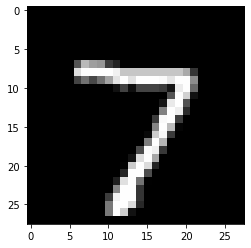

In [121]:
print(y[0])
plt.imshow(np.reshape(X[0],(28,28)),'gray')

In [118]:
yt = [0,2,3,4,5]
pred = np.arange(1,51)
pred = np.reshape(pred,(5,10))
print(pred)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]
 [31 32 33 34 35 36 37 38 39 40]
 [41 42 43 44 45 46 47 48 49 50]]


In [119]:
pred[range(len(yt)),yt]

array([ 1, 13, 24, 35, 46])

In [145]:
class SoftmaxRegression(_baseNetwork):
    def __init__(self, input_size=28 * 28, num_classes=10):
        """
        A single layer softmax regression. The network is composed by:
        a linear layer without bias => (activation) => Softmax
        :param input_size: the input dimension
        :param num_classes: the number of classes in total
        """
        super().__init__(input_size, num_classes)
        self._weight_init()

    def _weight_init(self):
        '''
        initialize weights of the single layer regression network. No bias term included.
        :return: None; self.weights is filled based on method
        - W1: The weight matrix of the linear layer of shape (num_features, hidden_size)
        '''
        np.random.seed(1024)
        self.weights['W1'] = 0.001 * np.random.randn(self.input_size, self.num_classes)
        self.gradients = np.zeros((self.input_size, self.num_classes))
      
    def derivative(self,y,x):
        h = 1e-5
        if len(x) == 2 and isinstance(x,tuple):
            pos_change_param = (x[0]+h,x[1])
            neg_change_param = (x[0]-h,x[1])
            
            pos_change = y(*pos_change_param)        
            neg_change = y(*neg_change_param)
        
            return (pos_change - neg_change) / 2*h
        else:
            return (y(x+h) - y(x-h))/2*h
        
    def predict_inv(self,weights, X):
        return np.matmul(weights,X.T)

    def forward(self, X, y, mode='train'):
        """
        Compute loss and gradients using softmax with vectorization.

        :param X: a batch of image (N, 28x28)
        :param y: labels of images in the batch (N,)
        :return:
            loss: the loss associated with the batch
            accuracy: the accuracy of the batch
        """
        loss = None
        gradient = None
        accuracy = None
        #############################################################################
        # TODO:                                                                     #
        #    1) Implement the forward process and compute the Cross-Entropy loss    #
        #    2) Compute the gradient of the loss with respect to the weights        #
        # Hint:                                                                     #
        #   Store your intermediate outputs before ReLU for backwards               #
        #############################################################################

        # Z = X * W
        print(X.shape,self.weights['W1'].shape)
        Z = np.matmul(X,self.weights['W1'])
        A = self.ReLU(Z)
        p = self.softmax(A)
        
        print(p.shape,y.shape)
        # TODO find accuracy
        # accuracy = np.sum((p == y)) / len(y)
        loss = self.cross_entropy_loss(p,y)
        print(loss)
        


        if mode != 'train':
            return loss, accuracy

        #############################################################################
        # TODO:                                                                     #
        #    1) Implement the backward process:                                     #
        #        1) Compute gradients of each weight by chain rule                  #
        #        2) Store the gradients in self.gradients                           #
        #############################################################################
        
        dw_A = self.derivative(self.cross_entropy_loss,(p,y)) * self.derivative(self.softmax,A)
        dw_Z = dw_A * self.derivative(self.ReLU,Z)
        
        for class_ in range(self.num_classes):
            print('hello g',self.predict_inv(self.weights['W1'][:,class_],X).shape,self.weights['W1'][:,class_].shape)
            print('Shape:',self.derivative(self.predict_inv,(self.weights['W1'][:,class_],X)).shape)
            self.gradients[:,class_] = dw_Z[class_] * self.derivative(self.predict_inv,(self.weights['W1'][:,class_],X))
            
            
        
        # self.gradients = dw_W
        self.weights['W1'] = self.weights['W1'] - self.lr * self.gradients

        return loss, accuracy
    
    
    def train(self,X,y,epochs,batch_size,learning_rate=0.001):
        loss_arr = []
        accuracy_arr = []
        self.lr = learning_rate
    
        for epoch in range(epochs):
            X_batch = X[epoch*batch_size:epoch*batch_size+batch_size]
            y_batch = y[epoch*batch_size:epoch*batch_size+batch_size]
            
            loss,accuracy = self.forward(X_batch,y_batch,'train')
            print(f"Epoch # {epoch+1}/{epochs} === Accuracy: {accuracy}, Loss: {loss}")
            
            loss_arr.append(loss)
            accuracy_arr.append(accuracy)
            
        return loss_arr, accuracy_arr
    
data_size = 50
batch_size = 5
epochs = 5

classifier = SoftmaxRegression()
loss, accuracy = classifier.train(X[:data_size],y[:data_size],epochs,batch_size)

(5, 784) (784, 10)
(5, 10) (5,)
3.6959928636697286
hello g (5,) (784,)
Shape: (5,)


ValueError: operands could not be broadcast together with shapes (10,) (5,) 

In [62]:
batch_size = 5
for epoch in range(10):
    print(f"{epoch*batch_size}:{epoch*batch_size+batch_size}")

0:5
5:10
10:15
15:20
20:25
25:30
30:35
35:40
40:45
45:50
